### Cloning the repository

In [1]:
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset.git

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 4260, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 4260 (delta 25), reused 8 (delta 8), pack-reused 4212 (from 1)
Receiving objects: 100% (4260/4260), 30.38 MiB | 12.87 MiB/s, done.
Resolving deltas: 100% (129/129), done.


### Importing the necessary libraries

In [3]:
import librosa
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Loading the Dataset

In [5]:
def load_dataset(data_path):
  audio_data=[]
  labels=[]
  for file in os.listdir(data_path):
    if file.endswith(".wav"):
      digit=int(file.split("_")[0])
      file_path=os.path.join(data_path,file)
      try:
        audio,sr=librosa.load(file_path,sr=8000)
        audio_data.append(audio)
        labels.append(digit)
      except Exception as e:
        print("Error loading {file}:{e}")
  return np.array(audio_data,dtype=object),np.array(labels)

In [10]:
### Extracting the MFCC Features

def extract_mfcc(audio_data,sr=8000,n_mfcc=13,n_fft=512,hop_length=128):
    mfcc=librosa.feature.mfcc(y=audio_data,sr=sr,n_mfcc=n_mfcc,n_fft=n_fft,hop_length=hop_length)
    return np.mean(mfcc.T,axis=0)

In [8]:
data_path="free-spoken-digit-dataset/recordings/"
audio_data,labels=load_dataset(data_path)
print(f"Loaded {len(audio_data)} audio files with {len(np.unique(labels))} labels")

Loaded 3000 audio files with 10 labels


In [11]:
# Extract Feautures
features=np.array([extract_mfcc(audio,sr=8000,n_mfcc=13,n_fft=512,hop_length=128) for audio in audio_data])

#Train-Test split
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=42)

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        64
           1       0.98      0.95      0.96        56
           2       0.93      0.93      0.93        59
           3       0.81      0.92      0.86        50
           4       0.98      0.98      0.98        60
           5       1.00      0.98      0.99        62
           6       0.95      0.87      0.90        60
           7       0.98      0.98      0.98        66
           8       0.95      0.95      0.95        63
           9       0.97      0.95      0.96        60

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



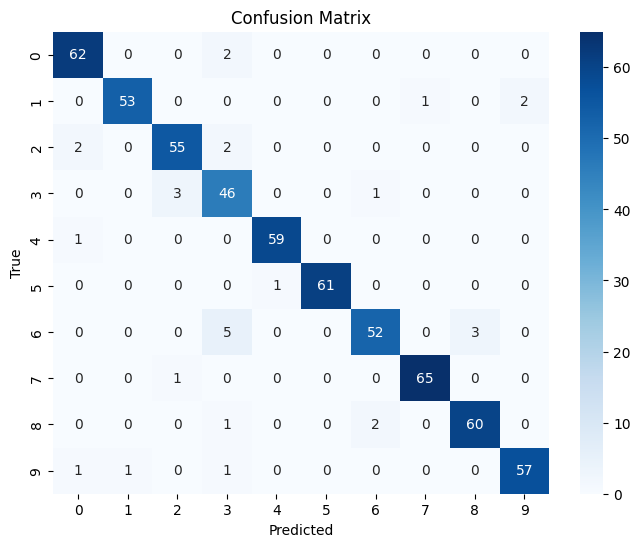

In [12]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

We see less wrongly predicted values and a good accuracy and classifaction report but can try other models to see which one might be better

Accuracy: 0.7883333333333333
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        64
           1       0.73      0.80      0.76        56
           2       0.81      0.73      0.77        59
           3       0.59      0.70      0.64        50
           4       0.92      0.93      0.93        60
           5       0.90      0.74      0.81        62
           6       0.82      0.75      0.78        60
           7       0.78      0.86      0.82        66
           8       0.87      0.83      0.85        63
           9       0.80      0.72      0.75        60

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.80      0.79      0.79       600



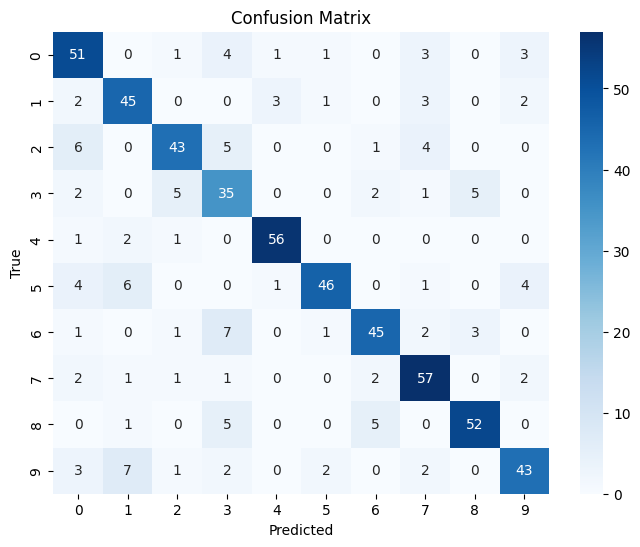

In [13]:
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)

dt_y_pred=dt_model.predict(X_test)
dt_accuracy=accuracy_score(y_test,dt_y_pred)
print(f"Accuracy: {dt_accuracy}")
print(classification_report(y_test,dt_y_pred))

dt_cm=confusion_matrix(y_test,dt_y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(dt_cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Worse than model 1 lets try boosting and bagging techniques as well



Accuracy: 0.935
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        64
           1       0.94      0.86      0.90        56
           2       0.93      0.88      0.90        59
           3       0.85      0.88      0.86        50
           4       0.97      0.97      0.97        60
           5       0.98      0.97      0.98        62
           6       0.92      0.97      0.94        60
           7       0.96      0.97      0.96        66
           8       0.95      0.97      0.96        63
           9       0.93      0.95      0.94        60

    accuracy                           0.94       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.94      0.94      0.93       600



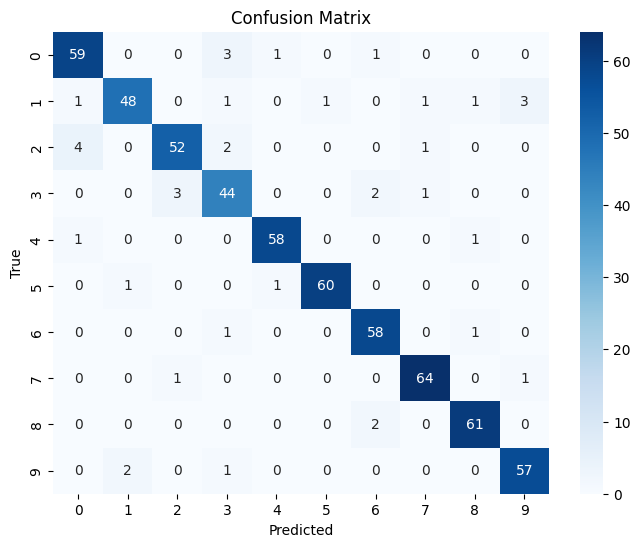

In [14]:
import xgboost as xgb

xgb_model=xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train,y_train)

xgb_y_pred=xgb_model.predict(X_test)
xgb_accuracy=accuracy_score(y_test,xgb_y_pred)
print(f"Accuracy: {xgb_accuracy}")
print(classification_report(y_test,xgb_y_pred))

xgb_cm=confusion_matrix(y_test,xgb_y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(xgb_cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Better than model 2 but slightly worse than model 1 but better for predicting class 3 as seen in classification report



Accuracy: 0.9116666666666666
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        64
           1       0.80      0.86      0.83        56
           2       0.91      0.88      0.90        59
           3       0.86      0.88      0.87        50
           4       0.93      0.95      0.94        60
           5       0.98      0.90      0.94        62
           6       0.92      0.92      0.92        60
           7       0.96      0.97      0.96        66
           8       0.97      0.95      0.96        63
           9       0.88      0.85      0.86        60

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



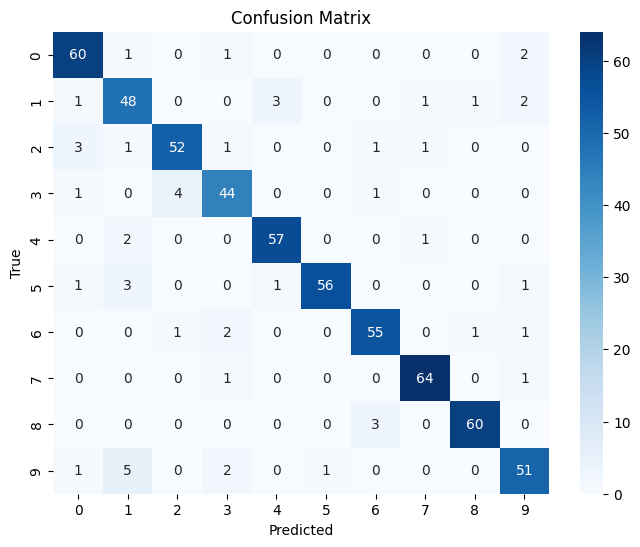

In [16]:
bagging_model=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=50,random_state=42)
bagging_model.fit(X_train,y_train)

bagging_y_pred=bagging_model.predict(X_test)
bagging_accuracy=accuracy_score(y_test,bagging_y_pred)
print(f"Accuracy: {bagging_accuracy}")
print(classification_report(y_test,bagging_y_pred))

bagging_cm=confusion_matrix(y_test,bagging_y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(bagging_cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Model 1 and 3 seems to be the best performing and model 3 shows better precission in predicting class 3 but overall model 1 seems to perform better
